In [22]:
import sys
sys.path.append('/Users/gscerberus/Desktop/Boston Houses Prediction')

In [23]:
from data_preprocessing.data_preprocessor import  DataPreprocessor
from model.linear_regression import  LinearRegression
from model_evaluation.model_evaluator import ModelEvaluator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [24]:
# calling dataset
dataset = DataPreprocessor('/Users/gscerberus/Desktop/Boston Houses Prediction/BostonHousing.csv').get_data()

In [25]:
# general view of the dataset
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
# imputing possible null values
imputer = SimpleImputer()
data_imputed = DataPreprocessor.impute_missing_values(imputer, dataset)

In [27]:
# remove possible duplicates
data_without_duplicates = DataPreprocessor.remove_duplicates(data_imputed)

In [28]:
# remove outliers in TAX and MEDV column
data_outliers_medv = DataPreprocessor.remove_outliers('medv', data_without_duplicates)
data_outliers_tax = DataPreprocessor.remove_outliers('tax', data_outliers_medv)

In [29]:
# scaling the features and creating the features and target datasets
scaler = StandardScaler()

# features
X = DataPreprocessor.feature_scaler(scaler, data_outliers_tax)
# target 
y = data_outliers_tax['medv']

In [30]:
# train test split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
# instantiating the model and performing all the necessary ML operations
model = LinearRegression(lr=0.01)
model.fit(X_train, y_train)

# generate predictions
y_pred = model.predict(X_test)

In [32]:
#C alculating mean squared error (the loss function)
print(f'Loss function is: {LinearRegression.mean_squared_error(y_test, y_pred)}')

Loss function is: 11.404750763540203


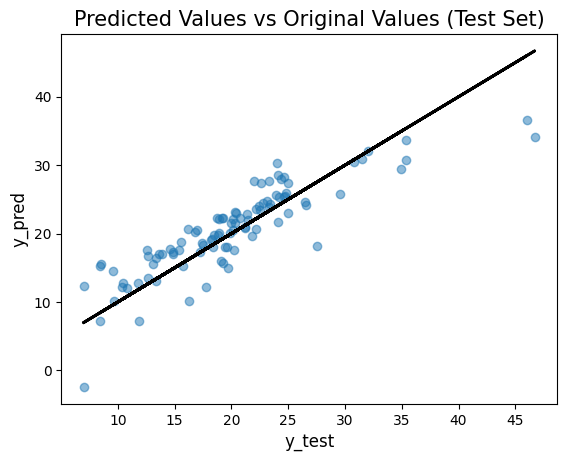

In [33]:
# building visualizations
ModelEvaluator.scatter_plot(y_test, y_pred)

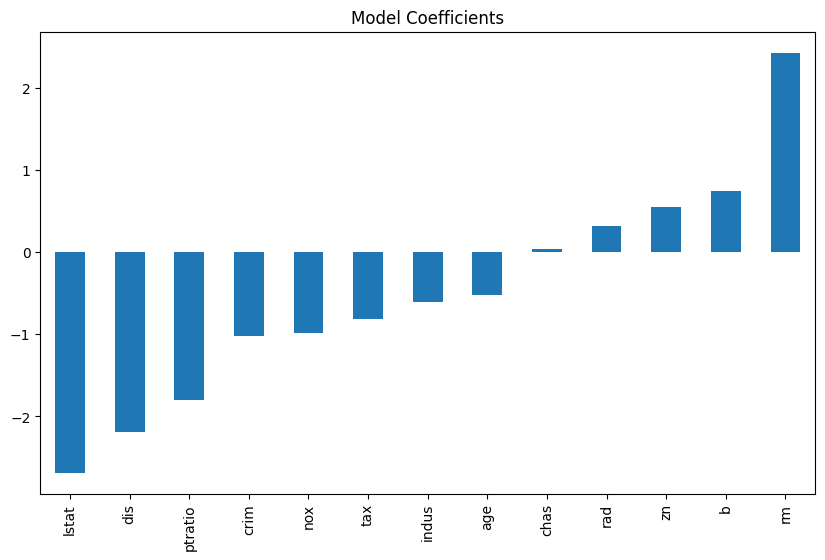

In [34]:
ModelEvaluator.weights_plot(model, X_test)